In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)



In [2]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

There are some unnecessary columns which we need to remove like FLAG_EMP_PHONE,FLAG_MOBIL,etc which doesn't have any relation with target.Here we can see that some columns like DAYS_BIRTH, DAYS_EMPLOYED,DAYS_REGISTRATION have negative values which is not possible. So we have to clean this in the later stage.

In [3]:
df.shape

(307511, 122)

In [4]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Removing the not required columns

In [5]:
not_required = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(not_required, axis=1, inplace = True)


Checking the percentage of null values in columns and dropping the columns which have 45% or more missing data as it is quite large data that is missing

In [6]:

df.isnull().sum()/len(df) * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0

In [7]:
missing_value_col = df.isnull().sum()
drop_cols = missing_value_col[missing_value_col.values> (0.45*len(df))]
df.drop(drop_cols.index, axis=1,inplace =True)

In [8]:
df.isnull().sum()/len(df) * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCES

Checking the column description and still we have some columns which has no relation with target. So dropping the same columns.

In [9]:
#dropping the not required

not_used = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
            'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_3','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

df.drop(not_used, axis = 1, inplace = True)

In [10]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

### Data imputing

**1. AMT_ANNUITY**

In [11]:
df.AMT_ANNUITY.describe()


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

As we can see the difference between max and 75 percentile is very large which means it has outlier so using median to impute.

In [12]:
impute_median = df.AMT_ANNUITY.median()
df.loc[df.AMT_ANNUITY.isnull(),'AMT_ANNUITY'] = impute_median

**2. NAME_TYPE_SUITE**

In [13]:
df.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

AS this is categorical column so we can impute with most occuring value

In [14]:

df.loc[df.NAME_TYPE_SUITE.isnull(), 'NAME_TYPE_SUITE'] = 'Unaccompanied'

**3. AMT_GOODS_PRICE**

In [15]:
df.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

As not clearly visible from the above data about outliers so plotting boxplot

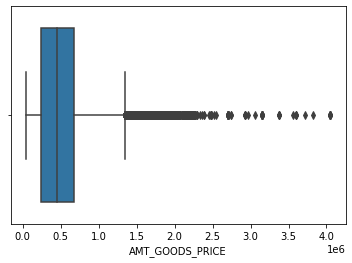

In [16]:
sns.boxplot(x=df.AMT_GOODS_PRICE)
plt.show()

As we can see there are outliers so using median to impute the values.

In [17]:
impute_val = df.AMT_GOODS_PRICE.median()
df.loc[df.AMT_GOODS_PRICE.isnull(), 'AMT_GOODS_PRICE'] = impute_val

**4. OCCUPATION_TYPE**

In [18]:
df.OCCUPATION_TYPE.value_counts()


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


This is categorcal column and has Missing Values at Random(MVAR). Also the missing percentage is 31% which is quite large
and imputing these values may impact the analysis. So dropping the column instead using ORGANISATION_TYPE column

In [19]:
df.drop(labels = 'OCCUPATION_TYPE', axis=1, inplace =True)

In [20]:

df.loc[df.CNT_FAM_MEMBERS.isnull(),'CNT_FAM_MEMBERS'] = df.CNT_FAM_MEMBERS.median()

In [21]:
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
CNT_FAM_MEMBERS                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATI

now we have cleaned the data and no missing values

## Data Analysis

In [22]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152664,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. DAYS_BIRTH is in negative, can be coverted into years and binned with age group
2. DAYS_EMPLOYED is in negative, can be converted into years
3. DAYS_EMPLOYED showed up max value is 365243.000000 is SD 141275.766519 and which is impossible value. This might be imputaion error
4. DAYS_REGISTRATION is in negative
5. DAYS_ID_PUBLISH is in negative

In [23]:
df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [24]:
df['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [25]:
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

1. DAYS_BIRTH -> Since it is age and cannot be negative, it has to be converted into positive
2. DAYS_EMPLOYED -> Since it is time period and cannot be negative, it has to be converted into positive
3. DAYS_EMPLOYED -> Highest duration of employement is 365243.000000 which is almost 1000+ years, practically impossible value and is an oulier
4. DAYS_REGISTRATION -> Since it is time period and cannot be negative, it has to be converted into positive

In [26]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['AGE'] =round( df['DAYS_BIRTH']/365,0)
df.AGE.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

### 1. AGE

Created a new column called AGE and binning into AGE_GRP

In [27]:
df['AGE_GRP'] = pd.cut(df.AGE,bins=np.linspace(20,70,num=20))
df.AGE_GRP.describe()

count               307511
unique                  19
top       (38.421, 41.053]
freq                 26120
Name: AGE_GRP, dtype: object

### 2. WORK_EXP 

In [28]:
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])
df['WORK_EXP'] = round(df['DAYS_EMPLOYED']/365,0)
df.WORK_EXP.describe()


count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: WORK_EXP, dtype: float64

Created a new column WORK_EXP. Above you can see that max value is 365243 which is like 1000 years which is impossible. So it is an outlier. Replacing with median.

In [29]:
df.loc[df.WORK_EXP == 1001.000000, 'WORK_EXP'] = df.WORK_EXP.median()
df.WORK_EXP.describe()

count    307511.000000
mean          6.436771
std           5.809292
min           0.000000
25%           3.000000
50%           6.000000
75%           8.000000
max          49.000000
Name: WORK_EXP, dtype: float64

#### 3. NAME_CONTRACT_TYPE

In [30]:
df.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

All values look fine

### 4.  CODE_GENDER

In [31]:
df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Replacing the XNA values with female as those are higher in no.

In [32]:
df.CODE_GENDER= df.CODE_GENDER.replace('XNA', 'F')
df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### 5. ORGANIZATION_TYPE

In [33]:
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [34]:
df.ORGANIZATION_TYPE.replace({"XNA": np.NaN}, inplace=True)
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

Replacing XNA with Nan values as those are MVAR (missing values at random). If imputed then it might impact the conclusion.

### 6. AMT_INCOME_TOTAL

In [35]:
#Binning the income
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [36]:
df['INCOME_GRP'] = pd.qcut(df.AMT_INCOME_TOTAL,q=[0,0.2,0.5,0.8,0.9,1],
                          labels=['Vey-Low','Low','Average','High','Very_high'])

## Data Imbalanced

([<matplotlib.patches.Wedge at 0x1c8a113e130>,
 [Text(-1.0648123216659293, 0.27599768047650985, 'Non-Default'),
  Text(1.0648123087455443, -0.27599773032397146, 'Default')])

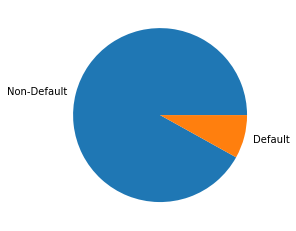

In [37]:
plt.pie(df.TARGET.value_counts(normalize=True)*100, labels = ['Non-Default','Default'])


1. Data is imbalance across defaulters and non-defaulters
2. Around 8 % of customers are observed as defaulters

In [38]:
df_def = df[df['TARGET']==1]
df_Ndef = df[df['TARGET']==0]

## Univariate Analysis (Categorical)

#### The analysis include the following columns NAME_CONTRACT_TYPE, NAME_FAMILY_STATUS, CODE_GENDER, NAME_TYPE_SUITE, CNT_FAM_MEMBERS,NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE,ORGANIZATION_TYPE, AGE_GRP, FLAG_OWN_CAR, INCOME_GRP

In [39]:
def plot_pie(variable):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,15))

    data_0 = df_Ndef[variable].value_counts()
    labels = data_0.index
    ax1.pie(data_0, autopct='%1.1f%%',
            shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    ax1.set_title('Non-defaulter')
    ax1.legend(labels, loc="lower right")

    data_1 = df_def[variable].value_counts()
    labels = data_1.index
    ax2.pie(data_1, autopct='%1.1f%%',
            shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    ax2.set_title('Defaulter')

    ax2.legend(labels, loc="lower right")

    plt.show()

Here we can't use line chart as the data is imbalanced so the scale is different and it will be difficult in drawing conclusions. So using pie chart and percentage as the parameter so it is easy to summarise tha data 

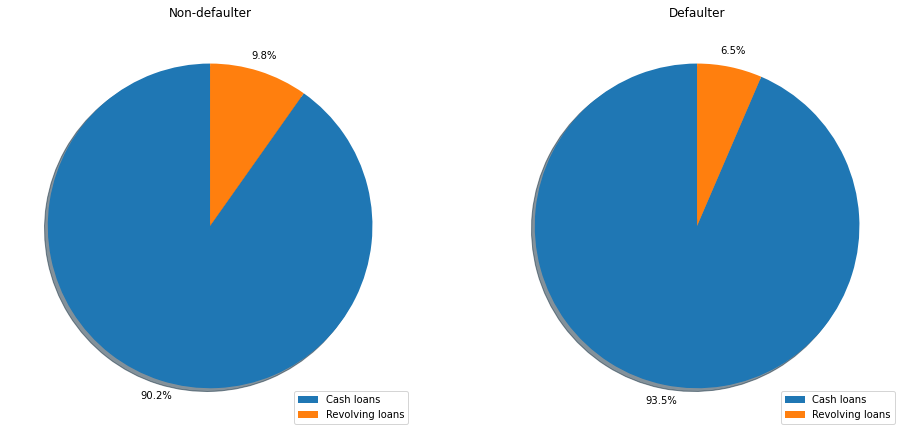

In [40]:
plot_pie('NAME_CONTRACT_TYPE')

**Conclusion** - Revolving loans are less defaults while non-defaulters have a higher percentage of cash loans.

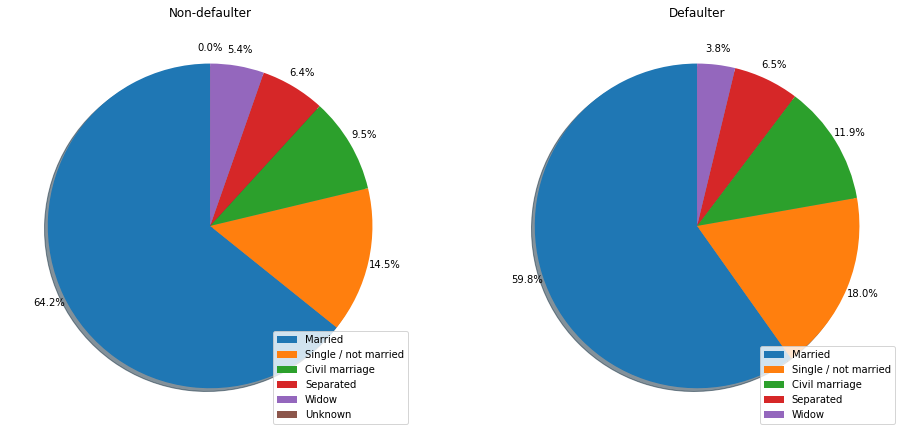

In [41]:
plot_pie('NAME_FAMILY_STATUS')

**Conclusion** - The percentage in non-defaulters for married is higher than that of defaulters, while defaulters have a higher percentage of single and civil married people.

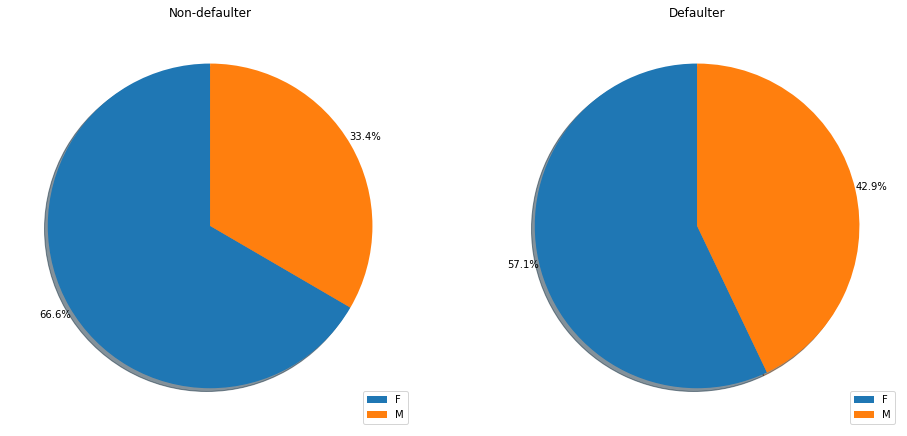

In [42]:
plot_pie('CODE_GENDER')

**Conclusion** - Females are in majority in both defaulter and non defaulter. Male percentage is more in defaulter.

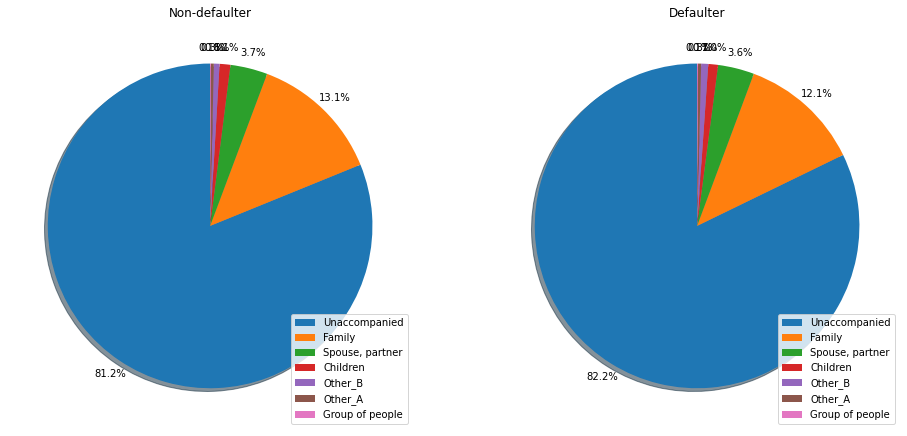

In [43]:
plot_pie('NAME_TYPE_SUITE')

**Conclusion** - Unaccompanied ones are higher in both defaulter and non defaulter.

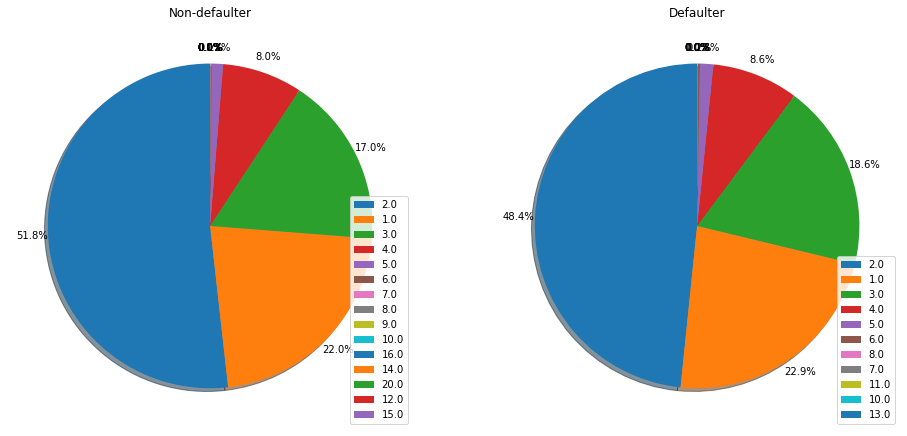

In [44]:
plot_pie('CNT_FAM_MEMBERS')

**Conclusion** - Family members of 2 have high percentage in both defaulter and non defaulter.

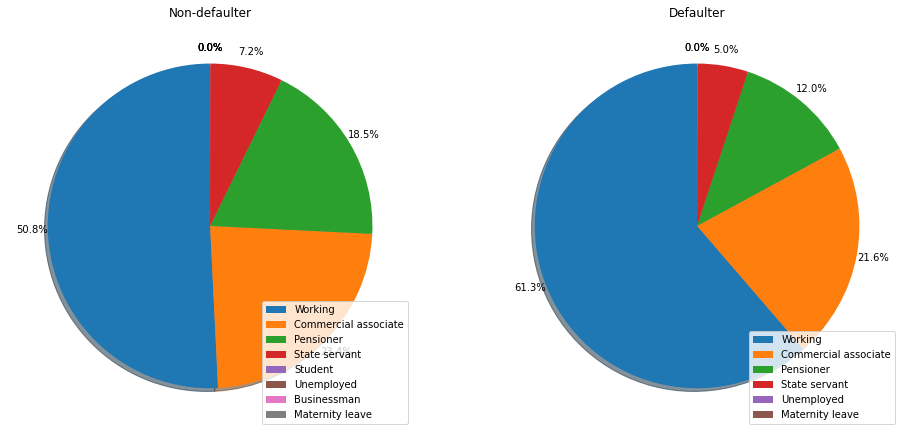

In [45]:
plot_pie('NAME_INCOME_TYPE')

**Conclusion** - Working professionsals have highest percentage in defaulter. State servants are the non defaulters. 

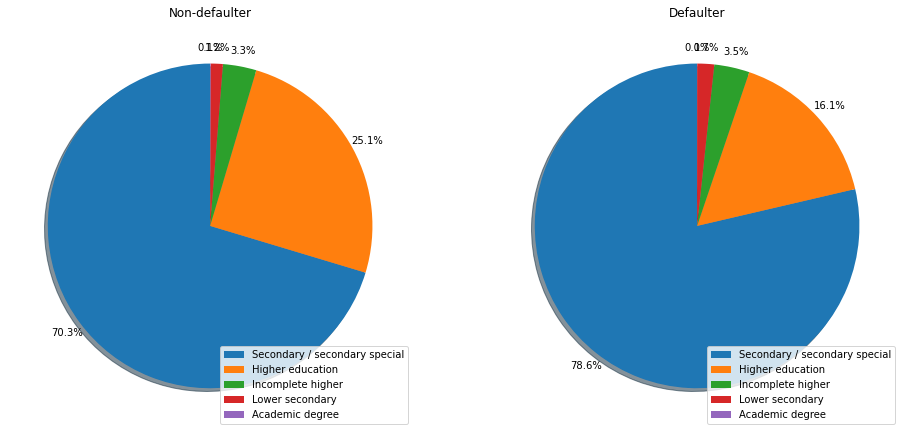

In [46]:
plot_pie('NAME_EDUCATION_TYPE')

**Conclusion** - People with Secondary education have highest percentage in defaulter. People with Higher education have highest percentage in Non defaulter

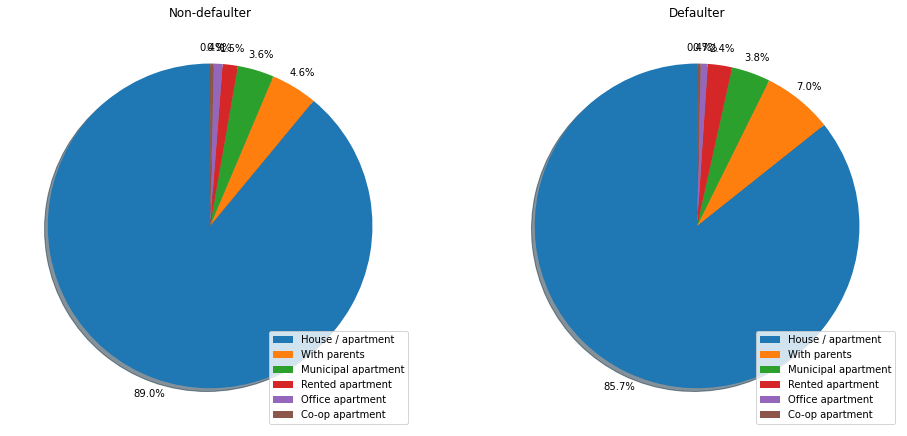

In [47]:
plot_pie('NAME_HOUSING_TYPE')

**Conclusion**  - The percentages of non-defaulters have houses is higher than that of defaulters, while defaulters have a higher percentage of living with parents.

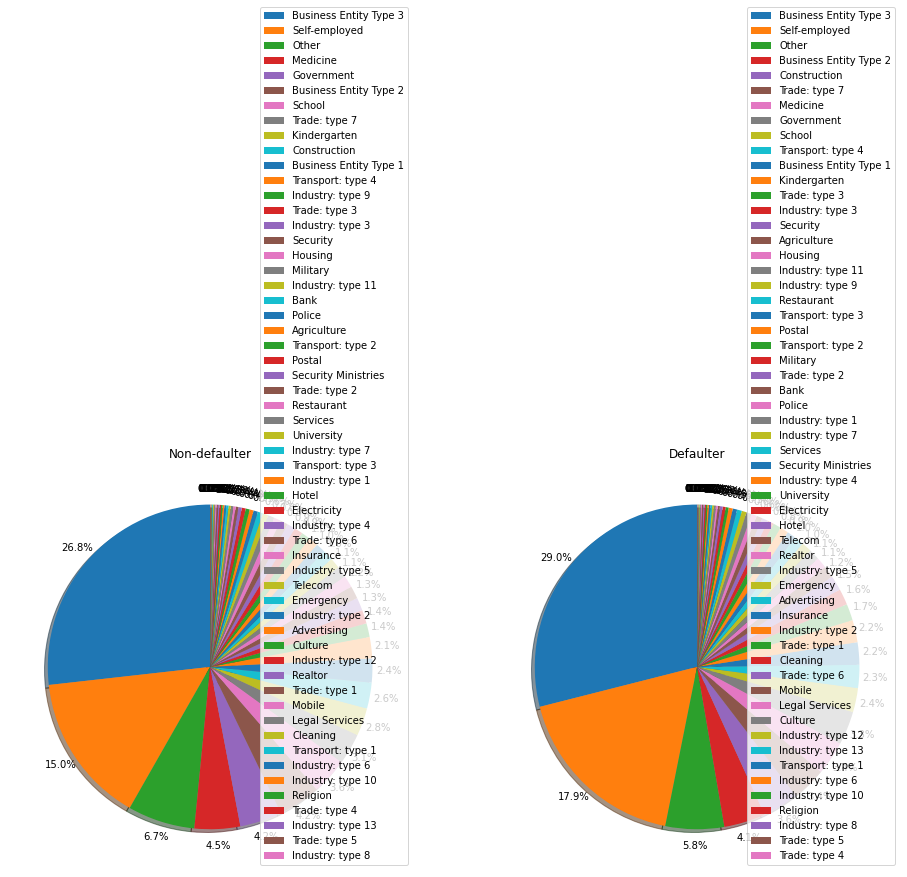

In [48]:
plot_pie('ORGANIZATION_TYPE')

**Conclusion** - People having business and self employed are most likely to default as they have higher percentage in defaulters.

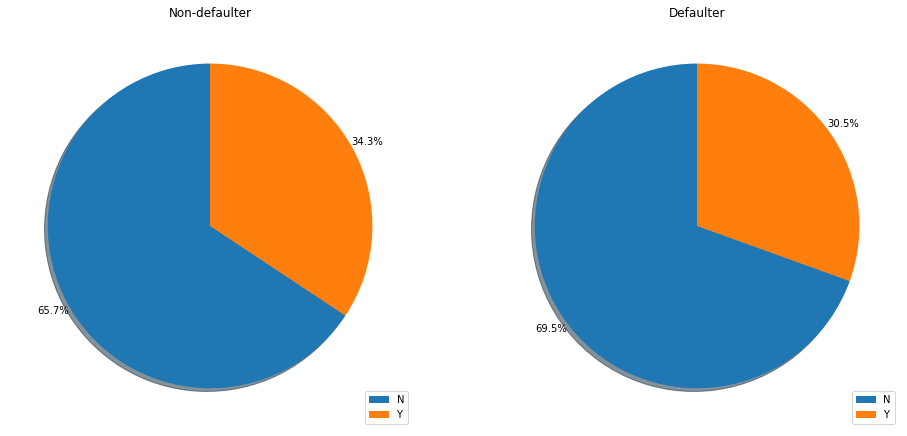

In [49]:
plot_pie('FLAG_OWN_CAR')

**Conclusion** - People who do not own car are most likely to default as they have higher percentage

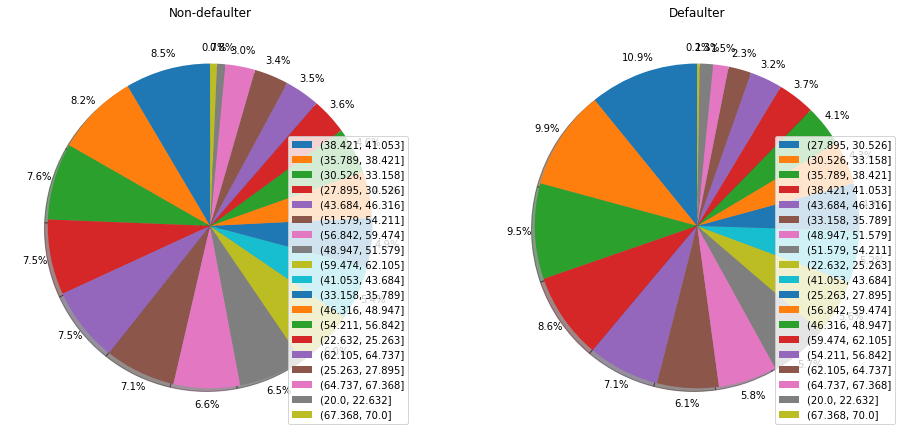

In [50]:
plot_pie('AGE_GRP')

**Conclusion** - People in the age bracket of 27-33 are most likely to default as they have higher percentge in defaulters.

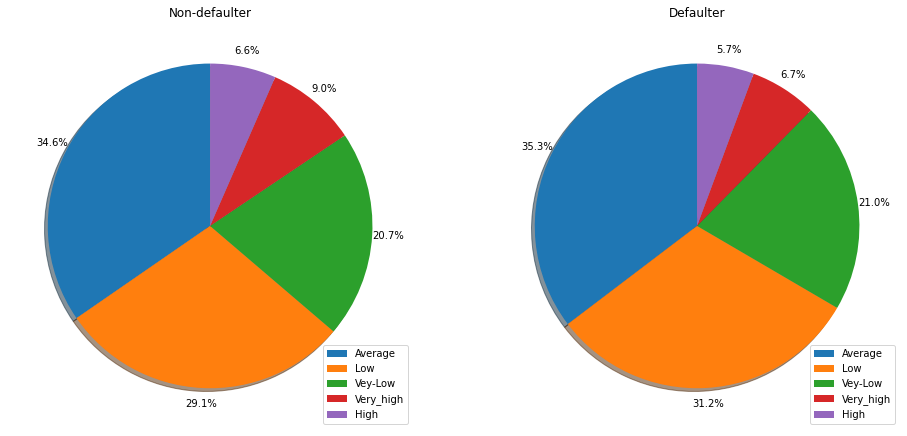

In [51]:
plot_pie('INCOME_GRP')

**Conclusion** - For both Defaulters and non-defaulters, most of people have a low income.

There is not much different between defaulters and non-defaulters. The percentage of defaulters having low income is higher than that of non-defaulters.

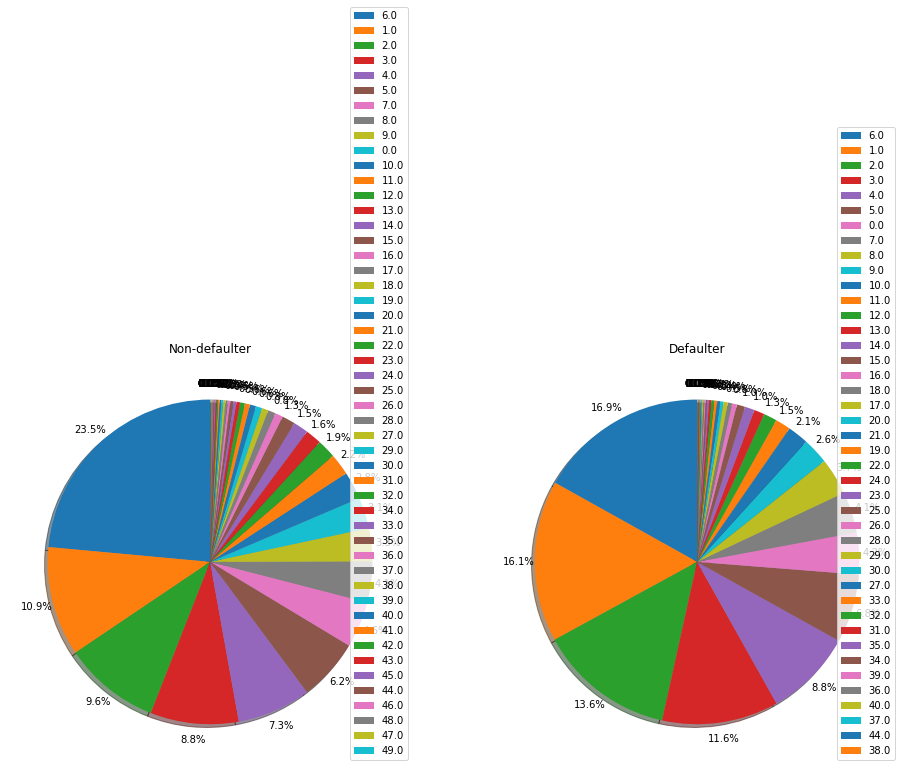

In [52]:
plot_pie('WORK_EXP')

**Conclusion** - People with 1-3 years of work experience are most likely to default.

# ## Univariate Analysis (Continuous)

This includes the following columns AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

In [53]:
def dist_plots(var):
    Ndf1 = df_Ndef[var]
    df1 = df_def[var]


    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))

    labels = ['Defaulters', 'Non-Defaulters']
    ax1.set_title('Distribution Plot')
    sns.distplot(df1,ax=ax1,label='Defaulters')
    sns.distplot(Ndf1,ax=ax1,label='Non-Defaulters')
    ax1.legend(labels, loc="center right")

    labels = ['Defaulters', 'Non-Defaulters']
    data = [df1, Ndf1]
    ax2.set_title('Box Plot')
    ax2.boxplot(data, labels=labels)

    plt.show()

C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


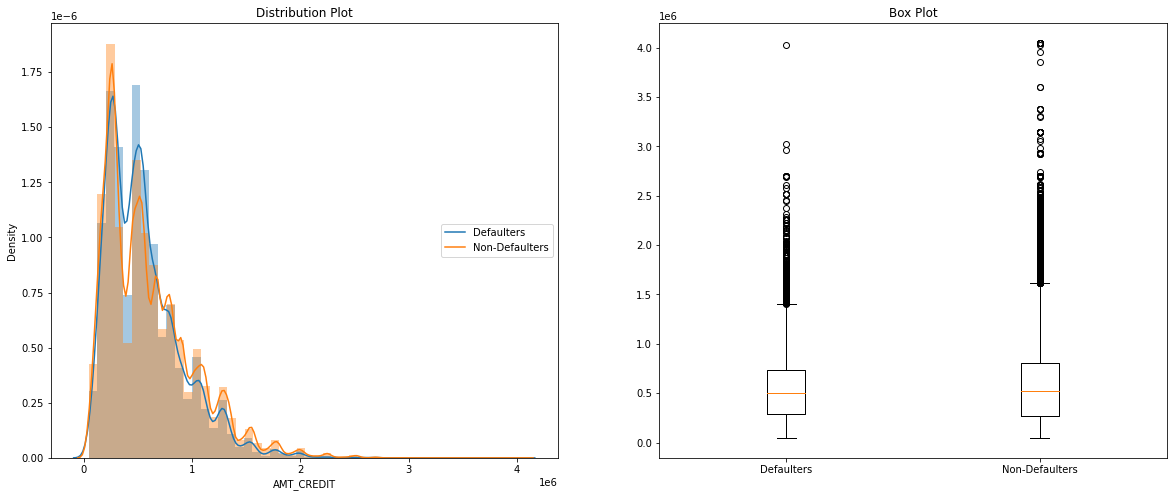

In [54]:
dist_plots('AMT_CREDIT')

**Conclusion** - The distribution is quite similar between Defaulters and non-Defaulters. Therefore, from the boxplot, it can be seen that the medians of defaulter and non-defaulters are almost equal. The outliers of non-defaulters have higher values than defaulters. Loan amount upto 50000 - 75000 and 125000 -200000 are likely to be more defaulters

C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


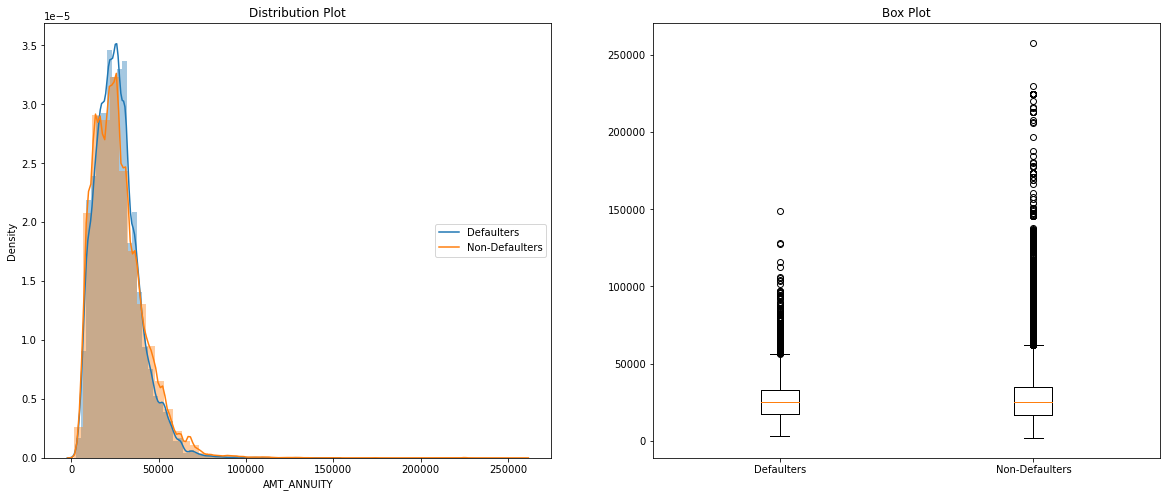

In [55]:
dist_plots('AMT_ANNUITY')

 The distribution is quite similar between Defaulters and non-Defaulters. Therefore, from the boxplot, it can be seen that the medians of defaulter and non-defaulters are almost equal. People who are repaying loan between 20000 to 40000 are more likely to be defaulters

C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


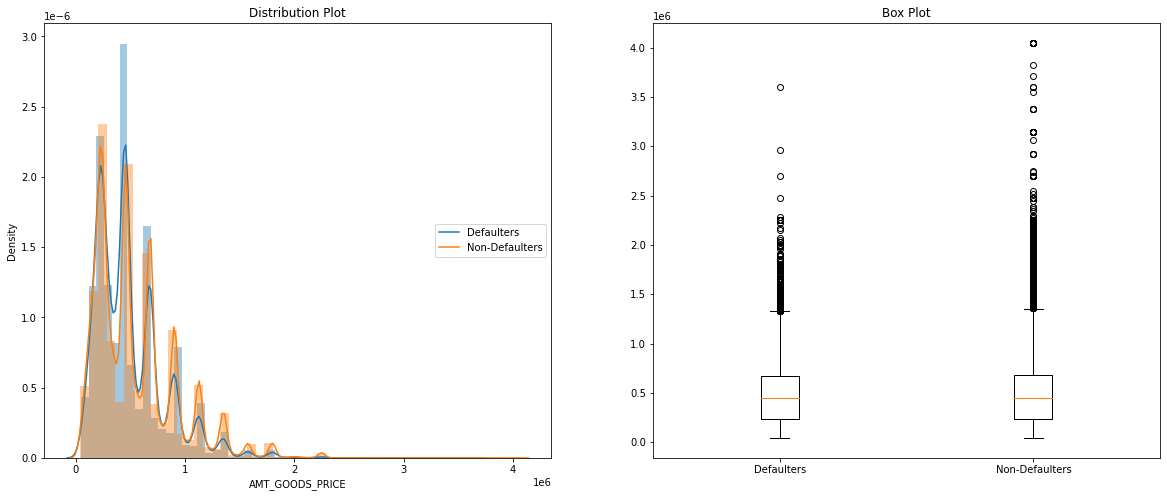

In [56]:
dist_plots('AMT_GOODS_PRICE')

**Conclusion** - People who are taking loand for goods whose price is 20000 to 60000 are defaulters. Similar to the credit amount, the distribution is quite similar between Defaulters and non-Defaulters. Therefore, from the boxplot, it can be seen that the medians of defaulter and non-defaulters are almost equal. The outliers of non-defaulters have higher values than defaulters.

# Bivariate Analysis (Continuous vs continuous)

Text(0, 0.5, 'Goods price')

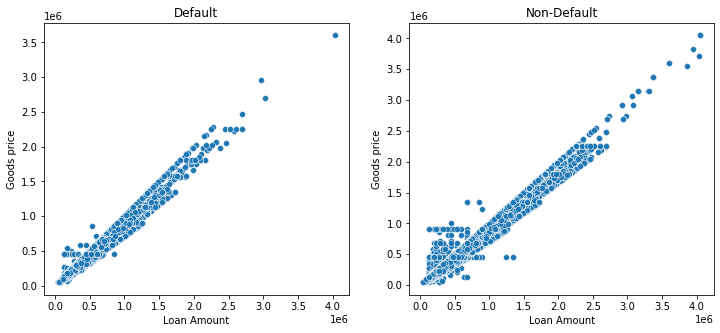

In [57]:
plt.subplots(nrows = 3,ncols=2,figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Default')
sns.scatterplot(y='AMT_GOODS_PRICE',x='AMT_CREDIT',data=df_def)
plt.xlabel('Loan Amount')
plt.ylabel('Goods price')

plt.subplot(1,2,2)
plt.title('Non-Default')
sns.scatterplot(y='AMT_GOODS_PRICE',x='AMT_CREDIT',data=df_Ndef)
plt.xlabel('Loan Amount')
plt.ylabel('Goods price')




**Conclusion** Most of the customers are availing loan greater than the goods price.There is direct relationship between goods price and loan amount.

Text(0, 0.5, 'Loan Annuity')

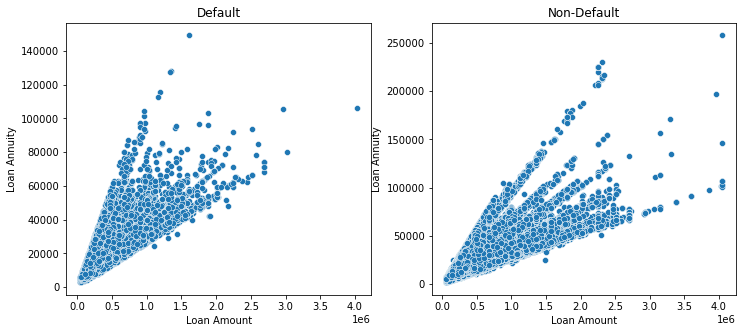

In [58]:
plt.subplots(nrows = 3,ncols=2,figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Default')
sns.scatterplot(y='AMT_ANNUITY',x='AMT_CREDIT',data=df_def)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Annuity')

plt.subplot(1,2,2)
plt.title('Non-Default')
sns.scatterplot(y='AMT_ANNUITY',x='AMT_CREDIT',data=df_Ndef)
plt.xlabel('Loan Amount')
plt.ylabel('Loan Annuity')

**Conclusion** - Loan annuity and loan amount both are directly related. Defaulters are mostly who has taken loan for large amount

Text(0, 0.5, 'Age')

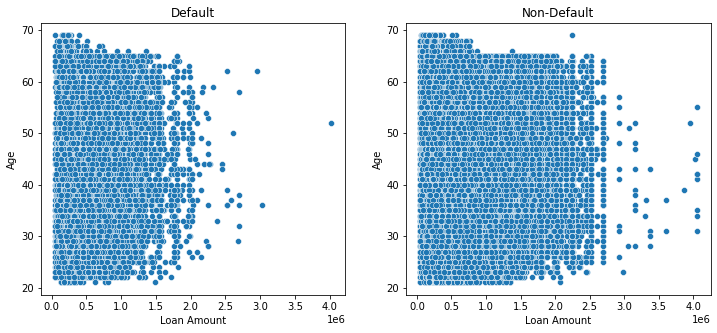

In [59]:
plt.subplots(nrows = 1,ncols=2,figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Default')
sns.scatterplot(y='AGE',x='AMT_CREDIT',data=df_def)
plt.xlabel('Loan Amount')
plt.ylabel('Age')

plt.subplot(1,2,2)
plt.title('Non-Default')
sns.scatterplot(y='AGE',x='AMT_CREDIT',data=df_Ndef)
plt.xlabel('Loan Amount')
plt.ylabel('Age')

**Conclusion** - There is no direct relationship between age and loan amount. We can observe that defaulters are taking high amount loan as compared to non defaulters.


# Bivariate Analysis (Continuous vs Categorical)

In [60]:
def plot_subplot(var1):
    
    plt.subplots(ncols=2,figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title('Default')
    sns.boxplot(x=var1,y='AMT_CREDIT',data=df_def)
    plt.ylabel('Loan Amount')
    plt.xlabel(var1)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title('Non-Default')
    sns.boxplot(x=var1,y='AMT_CREDIT',data=df_Ndef)
    plt.ylabel('Loan Amount')
    plt.xlabel(var1)
    plt.xticks(rotation=90)

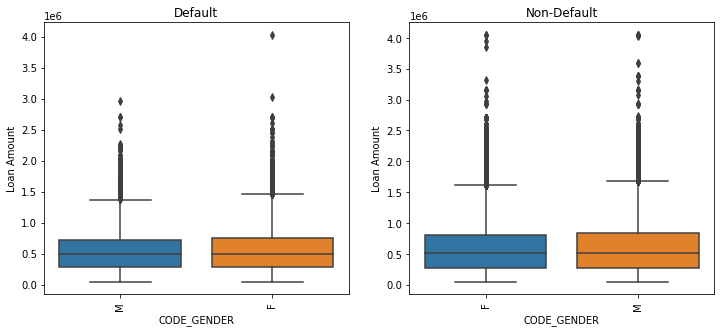

In [61]:
plot_subplot('CODE_GENDER')

Similar for both defaulters and non-defaulters, Female slightly more in defaulters.

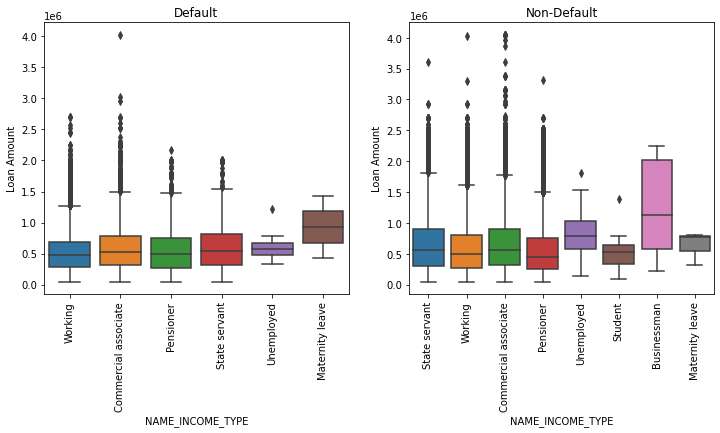

In [62]:
plot_subplot('NAME_INCOME_TYPE')

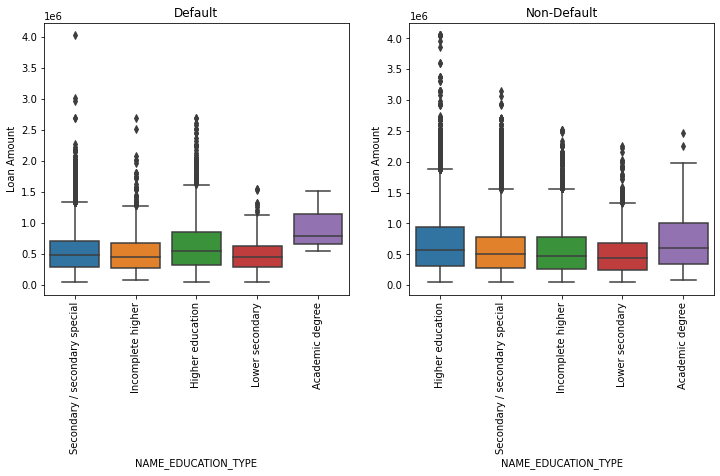

In [63]:
plot_subplot('NAME_EDUCATION_TYPE')

Similar for both defaulters and non-defaulters, people with academic degree and high education have more credits.

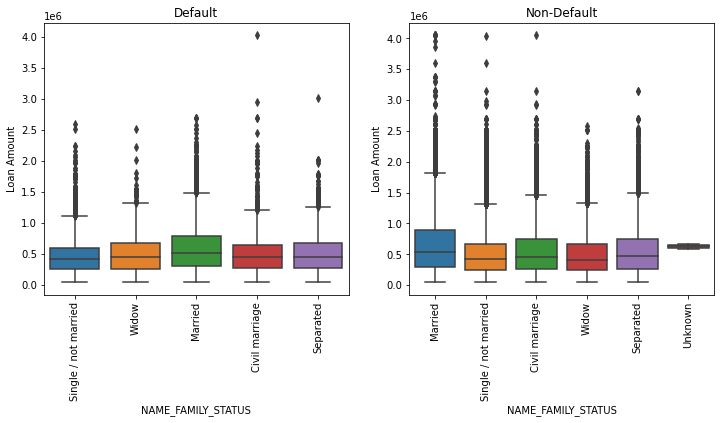

In [101]:
plot_subplot('NAME_FAMILY_STATUS')

Similar for both defaulters and non-defaulters, people who are married, civil married and separated have more credits.

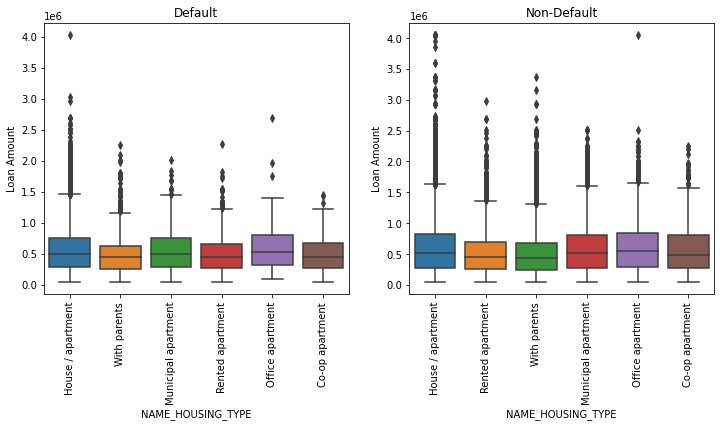

In [65]:
plot_subplot('NAME_HOUSING_TYPE')

Almost similar for both defaulters and non-defaulters, People living in office appartmentare high in number then comes people living in municipal appartment who have more credits

In [66]:
def plot_bivariate(variable_1,variable_2):
    
    plt.figure(figsize=(24,5))
    plt.subplot(1,2,1)
    plt.title('Defaulters')
    sns.countplot(x=variable_1,hue=variable_2,data=df_def)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)    
    plt.title('Non-Defaulters')
    sns.countplot(x=variable_1,hue=variable_2,data=df_Ndef)
    plt.xticks(rotation=90)

    plt.show()

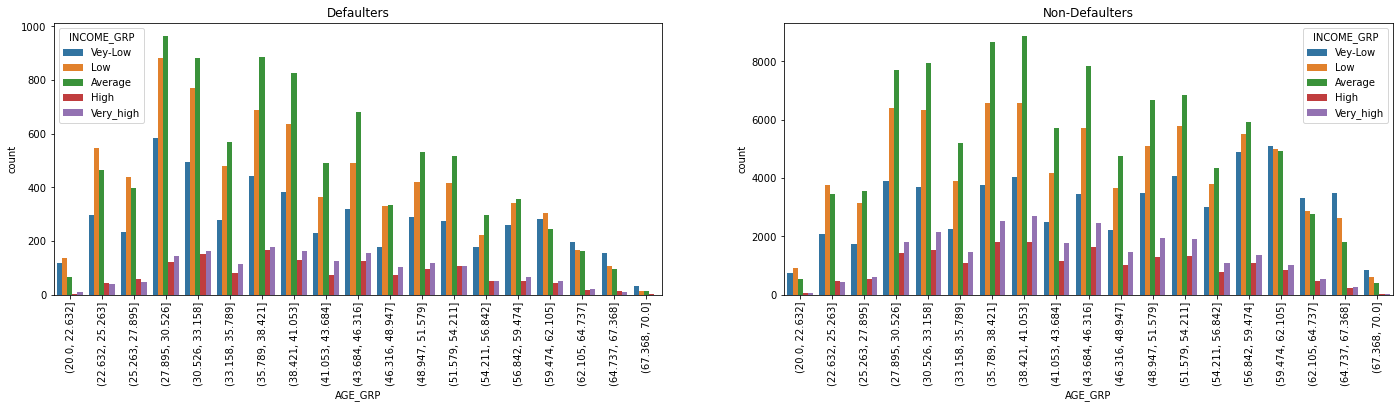

In [67]:
plot_bivariate('AGE_GRP','INCOME_GRP')

People in age group of 27-30 with average incoem are higher in defaulters.People in age 
group of 27-59 with average income have higher no in non defaulters

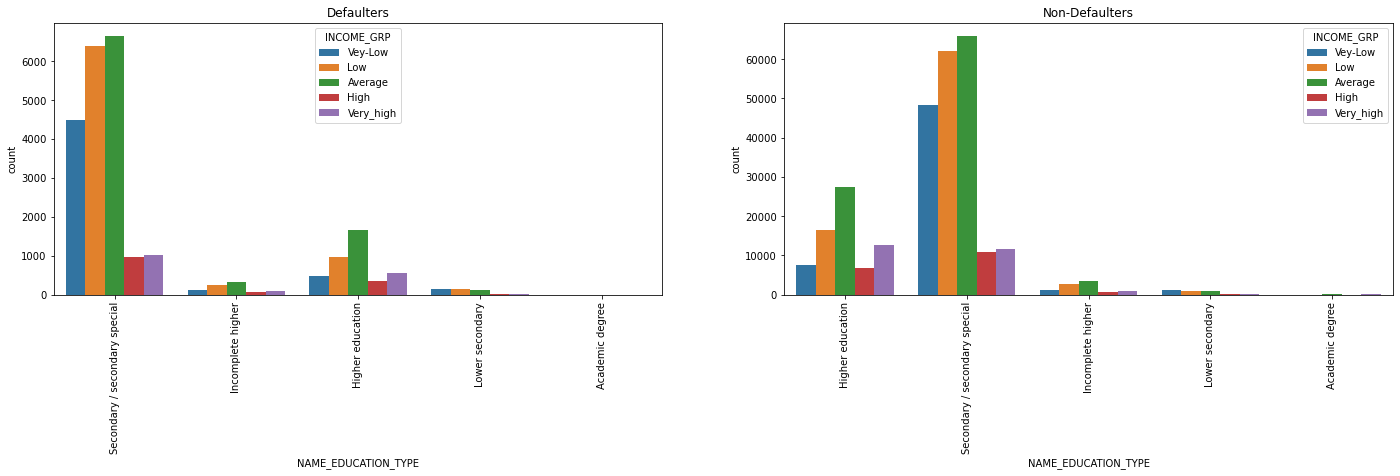

In [68]:
plot_bivariate('NAME_EDUCATION_TYPE','INCOME_GRP')

People with Secondary education and average income are higher in defaulters and non defaulters..

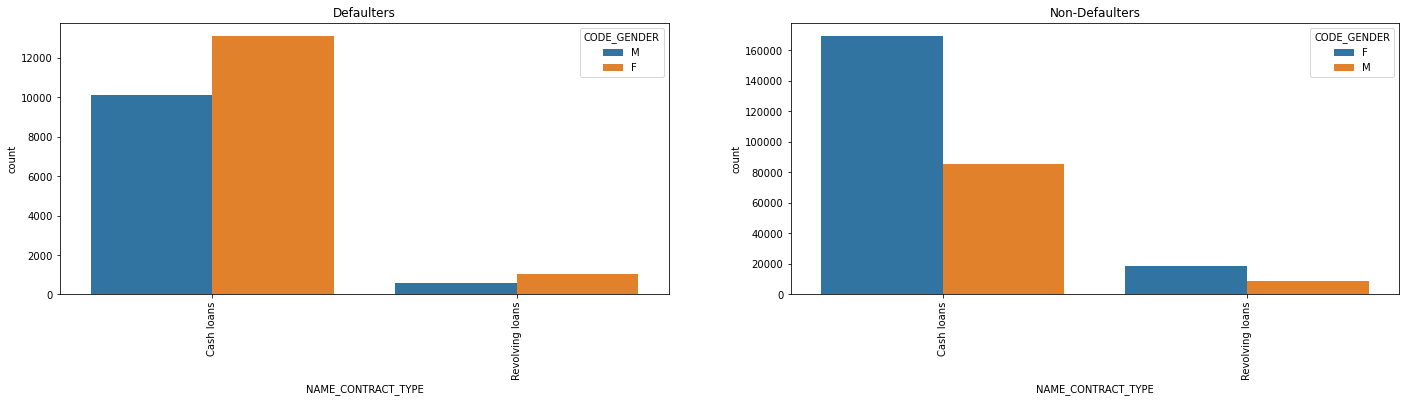

In [69]:
plot_bivariate('NAME_CONTRACT_TYPE','CODE_GENDER')

Females are higher in defaulters having both cash loans and revolving loans.

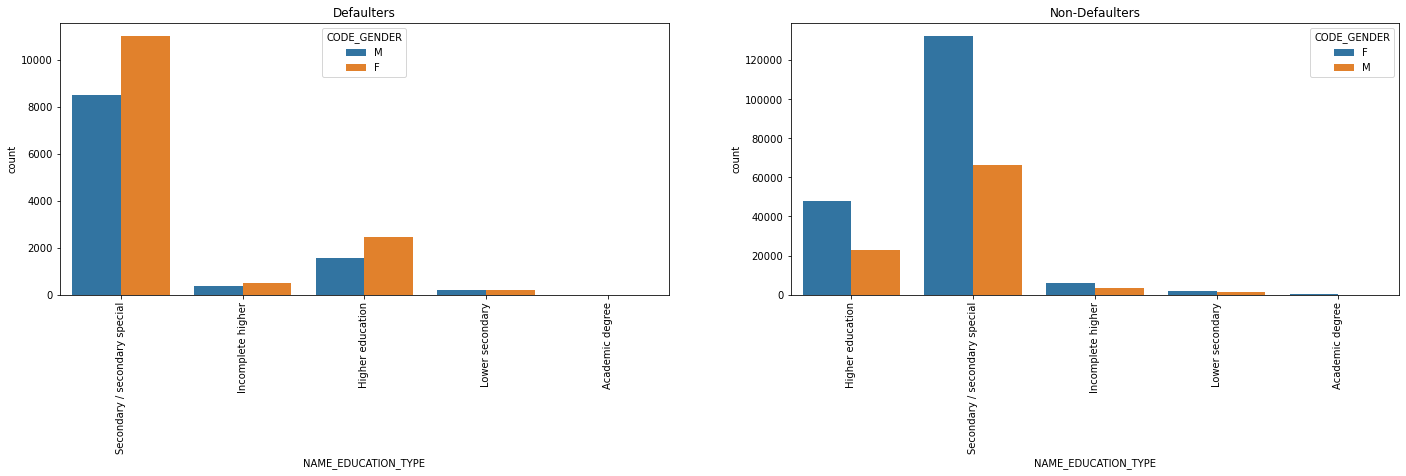

In [70]:
plot_bivariate('NAME_EDUCATION_TYPE','CODE_GENDER')

Females have higher number in defaulters with secondary education, incomplete higher, higher education

# Multivariate analysis

In [71]:
df_def.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,WORK_EXP
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,-0.002539,-0.003816,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.001299,-0.001041
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,-0.032299,0.885484,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.258910,-0.044876
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,-0.004215,0.006654,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.002872,-0.000321
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,-0.052329,0.051224,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.135318,0.099160
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752295,0.071690,0.014303,-0.081207,-0.034279,-0.016767,0.075711,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.014249,0.040451
AMT_GOODS_PRICE,-0.001814,NaN,-0.008111,0.037591,0.982783,0.752295,1.000000,0.076053,0.135738,0.006648,0.025661,-0.056061,0.047367,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.135671,0.104970
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,0.076053,1.000000,0.048190,0.015532,0.056222,-0.015537,-0.030163,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.048294,0.016457
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.135738,0.048190,1.000000,0.582185,0.289114,-0.252863,-0.203267,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.999680,0.282438
DAYS_EMPLOYED,-0.005161,NaN,-0.192864,-0.014977,0.001930,-0.081207,0.006648,0.015532,0.582185,1.000000,0.192455,-0.229090,-0.186515,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,0.581769,0.084758


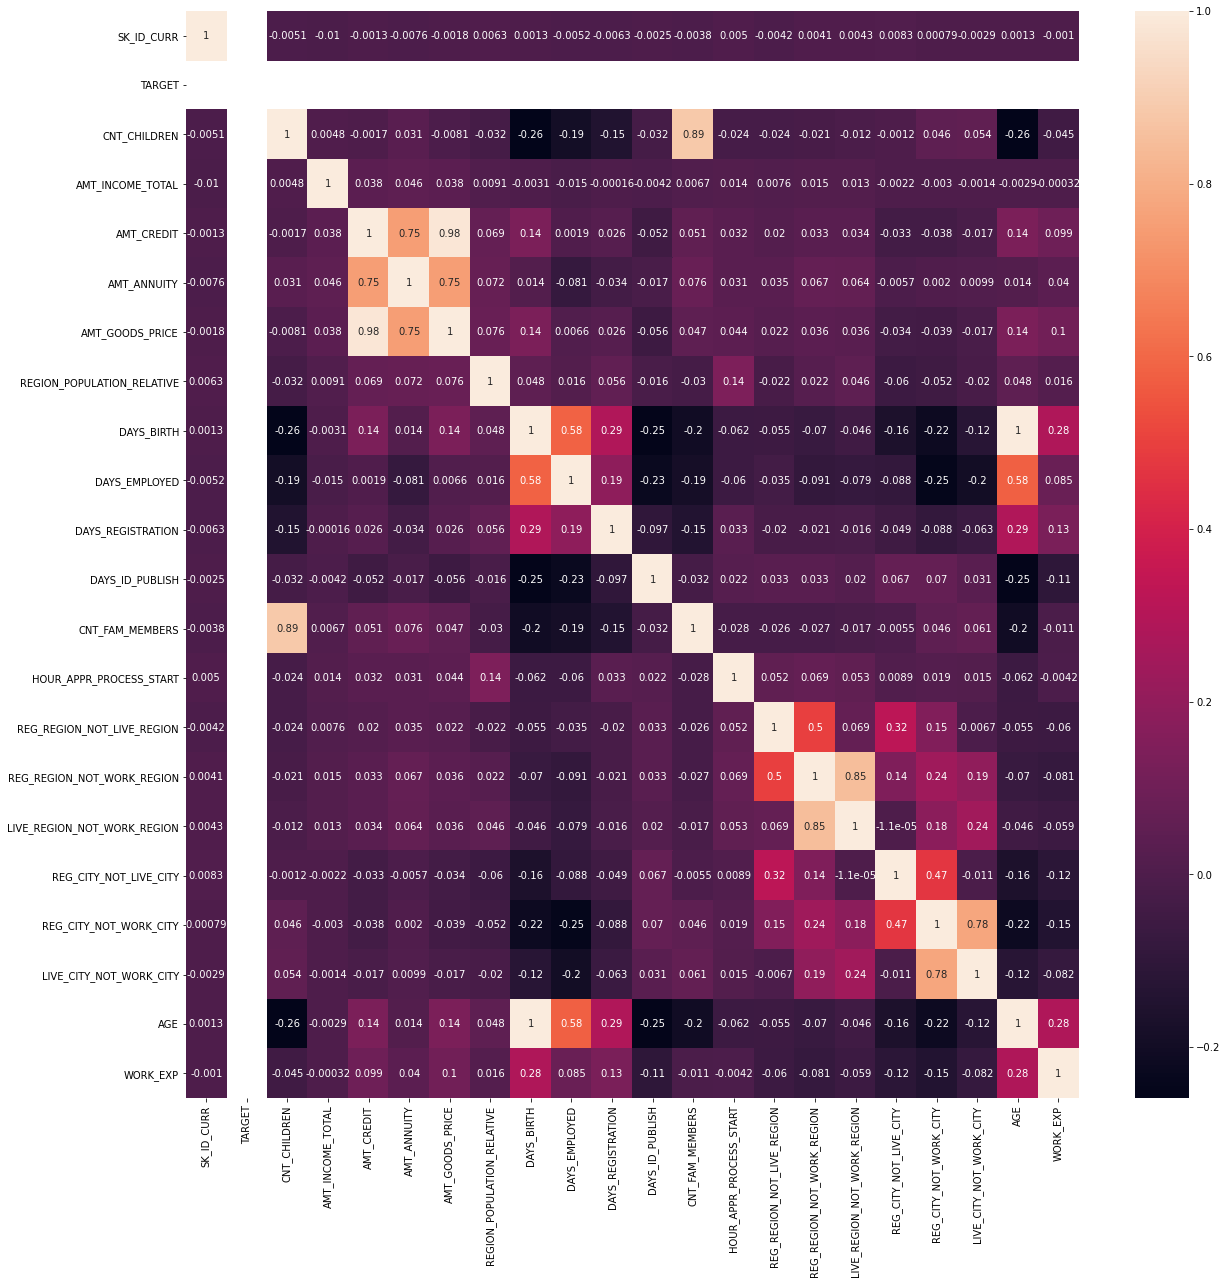

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(df_def.corr(),annot=True);
plt.savefig('output1.png', dpi=300, bbox_inches='tight')

In [73]:
corr_def = df_def.corr().where(np.triu(np.ones(df_def.corr().shape),k=1).astype(np.bool))
corr_def

<ipython-input-73-6d873765f555>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_def = df_def.corr().where(np.triu(np.ones(df_def.corr().shape),k=1).astype(np.bool))


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,WORK_EXP
SK_ID_CURR,NaN,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001814,0.006301,0.001254,-0.005161,-0.006342,-0.002539,-0.003816,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.001299,-0.001041
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.004796,-0.001675,0.031257,-0.008111,-0.031975,-0.259109,-0.192864,-0.149154,-0.032299,0.885484,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.258910,-0.044876
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.038131,0.046421,0.037591,0.009135,-0.003096,-0.014977,-0.000158,-0.004215,0.006654,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,-0.002872,-0.000321
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.752195,0.982783,0.069161,0.135316,0.001930,0.025854,-0.052329,0.051224,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.135318,0.099160
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.752295,0.071690,0.014303,-0.081207,-0.034279,-0.016767,0.075711,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.014249,0.040451
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076053,0.135738,0.006648,0.025661,-0.056061,0.047367,0.044302,0.022406,0.036285,0.035505,-0.034085,-0.038915,-0.016703,0.135671,0.104970
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048190,0.015532,0.056222,-0.015537,-0.030163,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.048294,0.016457
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.582185,0.289114,-0.252863,-0.203267,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.999680,0.282438
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.192455,-0.229090,-0.186515,-0.060000,-0.035025,-0.091145,-0.078787,-0.088177,-0.245827,-0.198484,0.581769,0.084758


In [74]:
corr_def = corr_def.unstack()
corr_def = corr_def.sort_values(ascending=False).drop_duplicates()

In [75]:
corr_def.columns=['var1','var2','correlation']

In [76]:
corr_def.head(10)

AGE                          DAYS_BIRTH                    0.999680
AMT_GOODS_PRICE              AMT_CREDIT                    0.982783
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.885484
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.778540
AMT_GOODS_PRICE              AMT_ANNUITY                   0.752295
AMT_ANNUITY                  AMT_CREDIT                    0.752195
DAYS_EMPLOYED                DAYS_BIRTH                    0.582185
AGE                          DAYS_EMPLOYED                 0.581769
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.497937
dtype: float64

In [77]:
df_Ndef.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,AGE,WORK_EXP
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000071,-0.000235,0.000360,0.001346,0.001744,0.001475,-0.000077,-0.002789,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001324,-0.000053
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020909,-0.000559,-0.024363,-0.336966,-0.245174,-0.185792,-0.028751,0.878571,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.336847,-0.049195
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418948,0.349426,0.167851,-0.062609,-0.140392,-0.064937,0.022896,0.034254,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,-0.062597,0.034954
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771297,0.987022,0.100604,0.047378,-0.070104,-0.013477,-0.001464,0.064536,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.047426,0.083118
AMT_ANNUITY,0.000071,NaN,0.020909,0.418948,0.771297,1.000000,0.776421,0.120977,-0.012260,-0.104975,-0.039435,0.014111,0.075789,0.053584,0.041983,0.080646,0.075464,-0.005679,0.001516,0.010577,-0.012199,0.052934
AMT_GOODS_PRICE,-0.000235,NaN,-0.000559,0.349426,0.987022,0.776421,1.000000,0.103826,0.044650,-0.068527,-0.015891,-0.003677,0.062763,0.062710,0.026738,0.054889,0.054371,-0.024879,-0.016761,0.001285,0.044686,0.084079
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120977,0.103826,1.000000,0.025244,-0.007198,0.052083,-0.001071,-0.023425,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.025168,-0.007647
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012260,0.044650,0.025244,1.000000,0.626114,0.333151,-0.271314,-0.285823,-0.095916,-0.066252,-0.097908,-0.071648,-0.179772,-0.241904,-0.160072,0.999706,0.238832
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104975,-0.068527,-0.007198,0.626114,1.000000,0.214511,-0.276663,-0.238300,-0.095455,-0.037502,-0.111011,-0.098920,-0.092842,-0.258121,-0.221387,0.625826,-0.029841


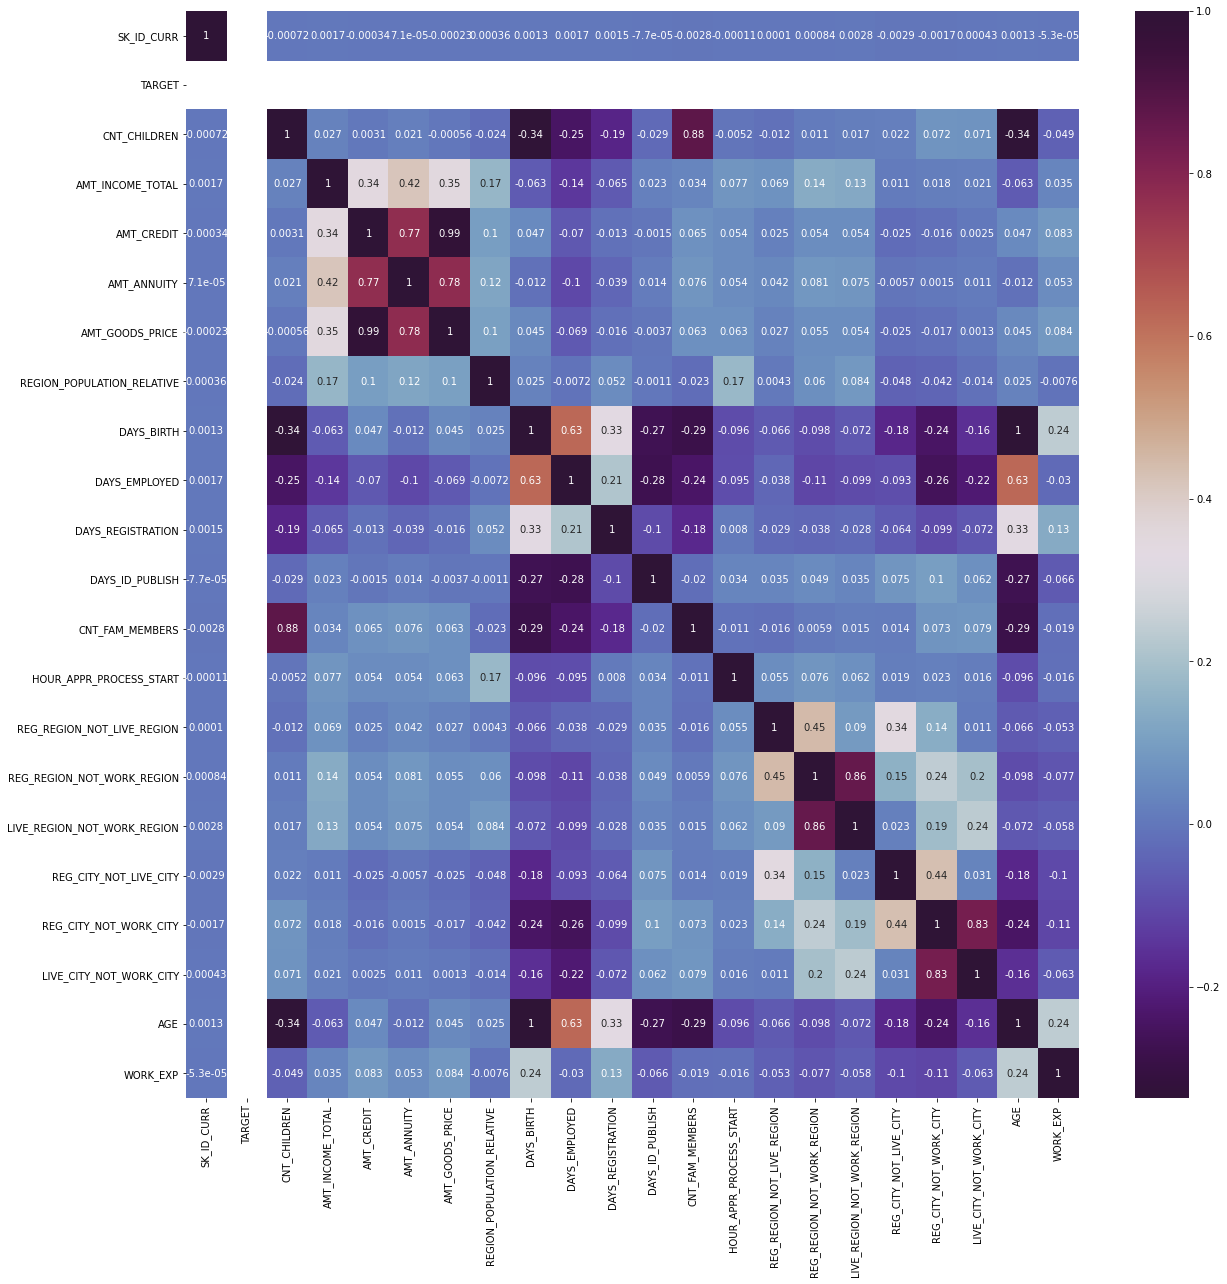

In [102]:
plt.figure(figsize=(20,20))
sns.heatmap(df_Ndef.corr(),annot=True,cmap='twilight_shifted');
plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [79]:
corr_Ndef = df_Ndef.corr().where(np.triu(np.ones(df_Ndef.corr().shape),k=1).astype(np.bool))


<ipython-input-79-2b764d270ada>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_Ndef = df_Ndef.corr().where(np.triu(np.ones(df_Ndef.corr().shape),k=1).astype(np.bool))


In [80]:
corr_Ndef = corr_Ndef.unstack()
corr_Ndef = corr_Ndef.sort_values(ascending=False).drop_duplicates()
corr_Ndef.head(10)   

AGE                          DAYS_BIRTH                    0.999706
AMT_GOODS_PRICE              AMT_CREDIT                    0.987022
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.878571
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.830381
AMT_GOODS_PRICE              AMT_ANNUITY                   0.776421
AMT_ANNUITY                  AMT_CREDIT                    0.771297
DAYS_EMPLOYED                DAYS_BIRTH                    0.626114
AGE                          DAYS_EMPLOYED                 0.625826
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.446101
dtype: float64

**Insights**
1. From heat map we can say that No field is correlated with the TARGET variable so we need some other information to draw conclusions on the target variable.
2. There is a strong correlation between (AMT_GOODS_PRICE and AMT_CREDIT) and (CNT_FAM_MEMBERS and CNT_CHILDREN ) so we can use any one of them to do regression analysis.
3.  But these insights are not helpful as it is obvious that if goods price is high people will apply for high loan. The no of members increases if the count of children increases as children are part of family itself.

**Final Conclusion for application_data CSV**

1. Banks should focus more on clients with  
   --contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful          payments.
   
   --from housing type ‘With parents’ as they are having least number of unsuccessful payments.
   
   --family members of 3 or more and owns a car


2. Banks should be cautious with Clients
   
   --in age group 27-30 years with income type 'average' and contract type ‘Working’ and 'Unaccompanied' as they are having           most number of unsuccessful payments.
   
   --from housing type 'Rented/ Municipal appartment'
   
   --with loan purpose ‘Repair’
   
   --who are females having education type 'secondary education'/'incomplete higher'/'higher education' and contrct type 'cash      loans/revolving loans'
   
   -- with Family members of 2 and do not own a car


# Dataset 2 - Previous_application

In [81]:
# loading the previous_application.csv
appdata_prev = pd.read_csv('previous_application.csv')

In [82]:
appdata_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# chnaging the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in appdata_prev if col.startswith('DAYS')]
appdata_prev[filter_col]= abs(appdata_prev[filter_col])

In [84]:
appdata_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# XNA and XAP are replaced by NaN
appdata_prev=appdata_prev.replace('XNA', np.NaN)
appdata_prev=appdata_prev.replace('XAP', np.NaN)

In [86]:
appdata_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,NaN,Approved,73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Value counts of Contract Status in previous application
appdata_prev['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

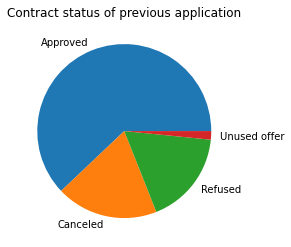

In [88]:
# Some Univariate Analysis on previous application data
# Contract Status
# Contract status of previous application
temp = appdata_prev["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': temp.index,'values': temp.values})

plt.pie(temp, labels = temp.index)


plt.title('Contract status of previous application')
plt.show()

We can observe that majority of loans are approved and very less percentage of loans are unused offer

On which day clients applied for loan in previous data and their counts

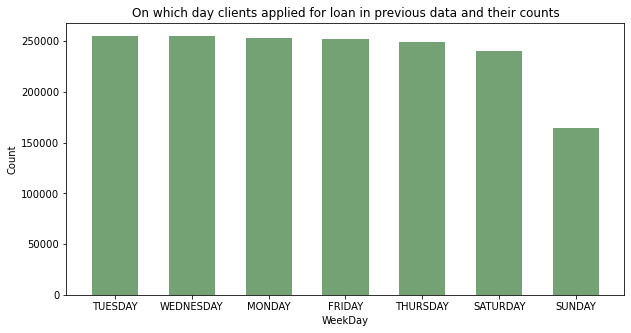

In [89]:
temp = appdata_prev["WEEKDAY_APPR_PROCESS_START"].value_counts()

fig = plt.figure(figsize = (10, 5))

plt.bar(temp.index, temp, color = '#75a275', width = 0.6 )

plt.xlabel("WeekDay")
plt.ylabel("Count")
plt.title("On which day clients applied for loan in previous data and their counts")

plt.show()

We observe that there are less number of applicants that come in the weekends.

## Payment Method

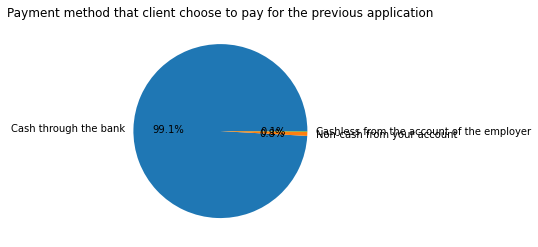

In [90]:
# Payment method that client choose to pay for the previous application
temp = appdata_prev["NAME_PAYMENT_TYPE"].value_counts()

df = pd.DataFrame({'labels': temp.index,'values': temp.values})

plt.pie(temp, labels = temp.index, autopct='%1.1f%%')


plt.title('Payment method that client choose to pay for the previous application')
plt.show()

99% of the clients chose to pay cash through bank.

### Reasons of previous application rejection

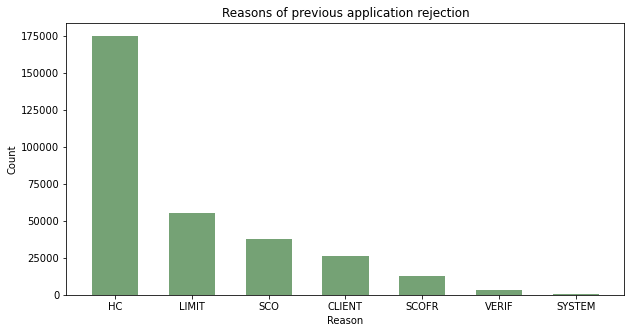

In [91]:
# Reasons of previous application rejection
temp = appdata_prev["CODE_REJECT_REASON"].value_counts()

fig = plt.figure(figsize = (10, 5))

plt.bar(temp.index, temp, color = '#75a275', width = 0.6 )

plt.xlabel("Reason")
plt.ylabel("Count")
plt.title("Reasons of previous application rejection")

plt.show()

We observe that HC is the reason majority of applications got rejetced.


### Client Type

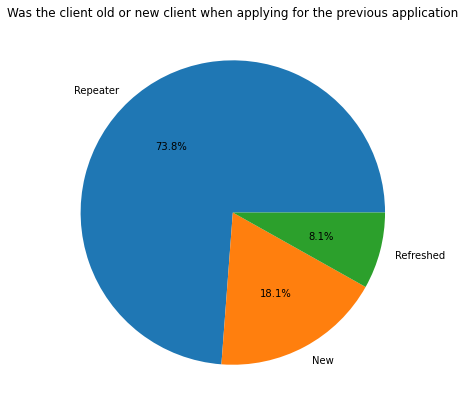

In [92]:
# Was the client old or new client when applying for the previous application
temp = appdata_prev["NAME_CLIENT_TYPE"].value_counts()

fig = plt.figure(figsize = (10, 7))
df = pd.DataFrame({'labels': temp.index,'values': temp.values})

plt.pie(temp, labels = temp.index, autopct='%1.1f%%')


plt.title('Was the client old or new client when applying for the previous application')
plt.show()

We obeserve that majority of the clients are repeters.

**Was the previous application for CASH, POS, CAR, CARDS**

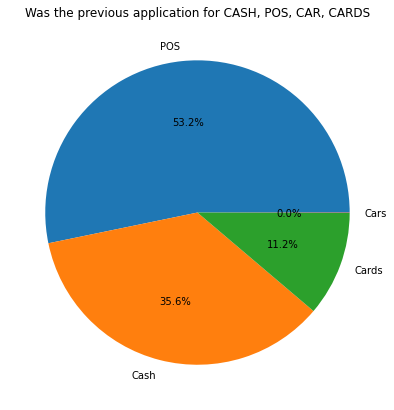

In [93]:
# Was the previous application for CASH, POS, CAR, CARDS
temp = appdata_prev["NAME_PORTFOLIO"].value_counts()

fig = plt.figure(figsize = (10, 7))
df = pd.DataFrame({'labels': temp.index,'values': temp.values})

plt.pie(temp, labels = temp.index, autopct='%1.1f%%')


plt.title('Was the previous application for CASH, POS, CAR, CARDS')
plt.show()

We observe that majority of previous application is for POS and a good amount of it is for cash.

### Type of goods

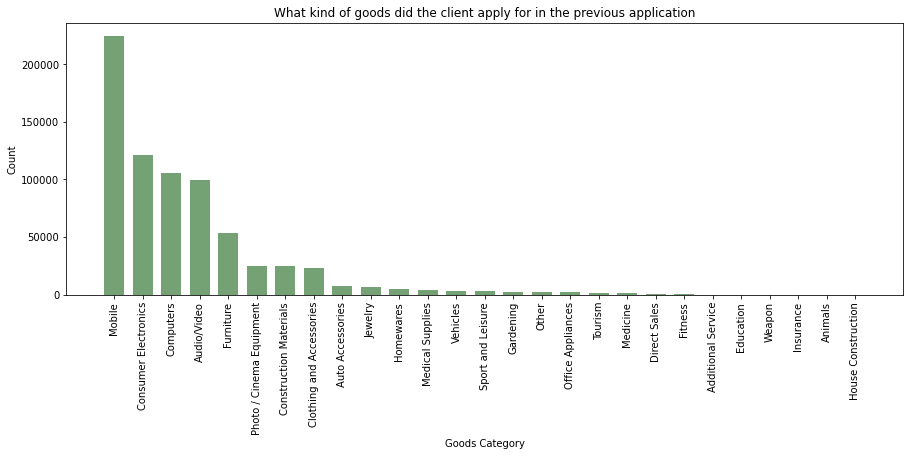

In [94]:
# What kind of goods did the client apply for in the previous application
temp = appdata_prev["NAME_GOODS_CATEGORY"].value_counts()

fig = plt.figure(figsize = (15, 5))

plt.bar(temp.index, temp, color = '#75a275', width = 0.7 )

plt.xlabel("Goods Category")
plt.ylabel("Count")
plt.title("What kind of goods did the client apply for in the previous application")

plt.xticks(rotation = 90)
plt.show()

We observe that the majority of loans are for mobiles, consumer electronics, computers and furnitures.

### Univariate analysis of numerical columns

C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


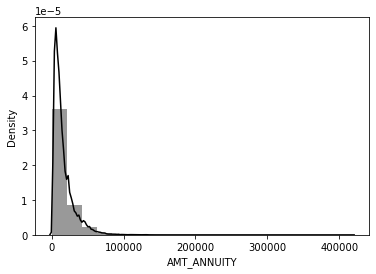

In [95]:
sns.distplot(appdata_prev['AMT_ANNUITY'], kde= True, color = 'black', bins = 20)

plt.show()

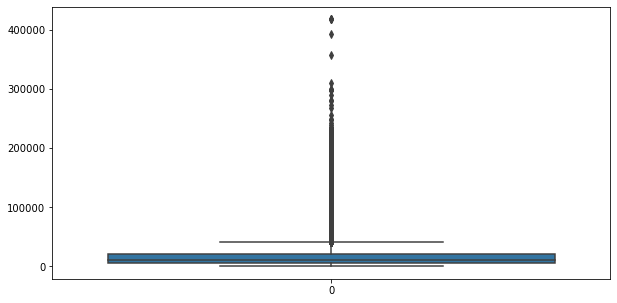

In [96]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(data = appdata_prev['AMT_ANNUITY'])
plt.show()

We observe that there are some outliers and the curve is not normal or a bell curve

C:\Users\AVTJUV744\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


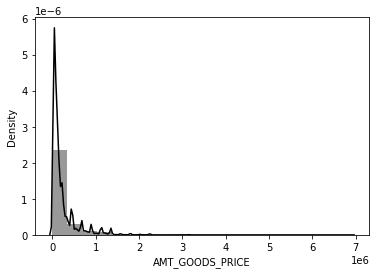

In [97]:
sns.distplot(appdata_prev['AMT_GOODS_PRICE'], kde= True, color = 'black', bins = 20)
plt.show()

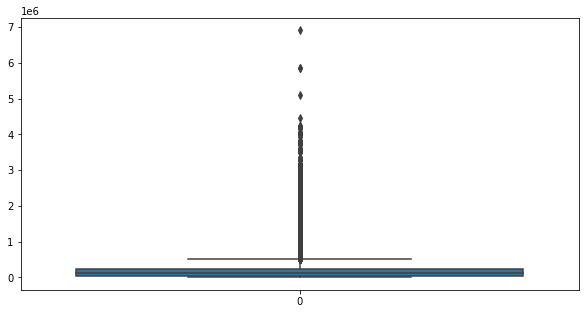

In [98]:
fig = plt.figure(figsize = (10, 5))
sns.boxplot(data = appdata_prev['AMT_GOODS_PRICE'])
plt.show()

We observe that there are some outliers and the curve is not normal or a bell curve

### Multivariate Analysis

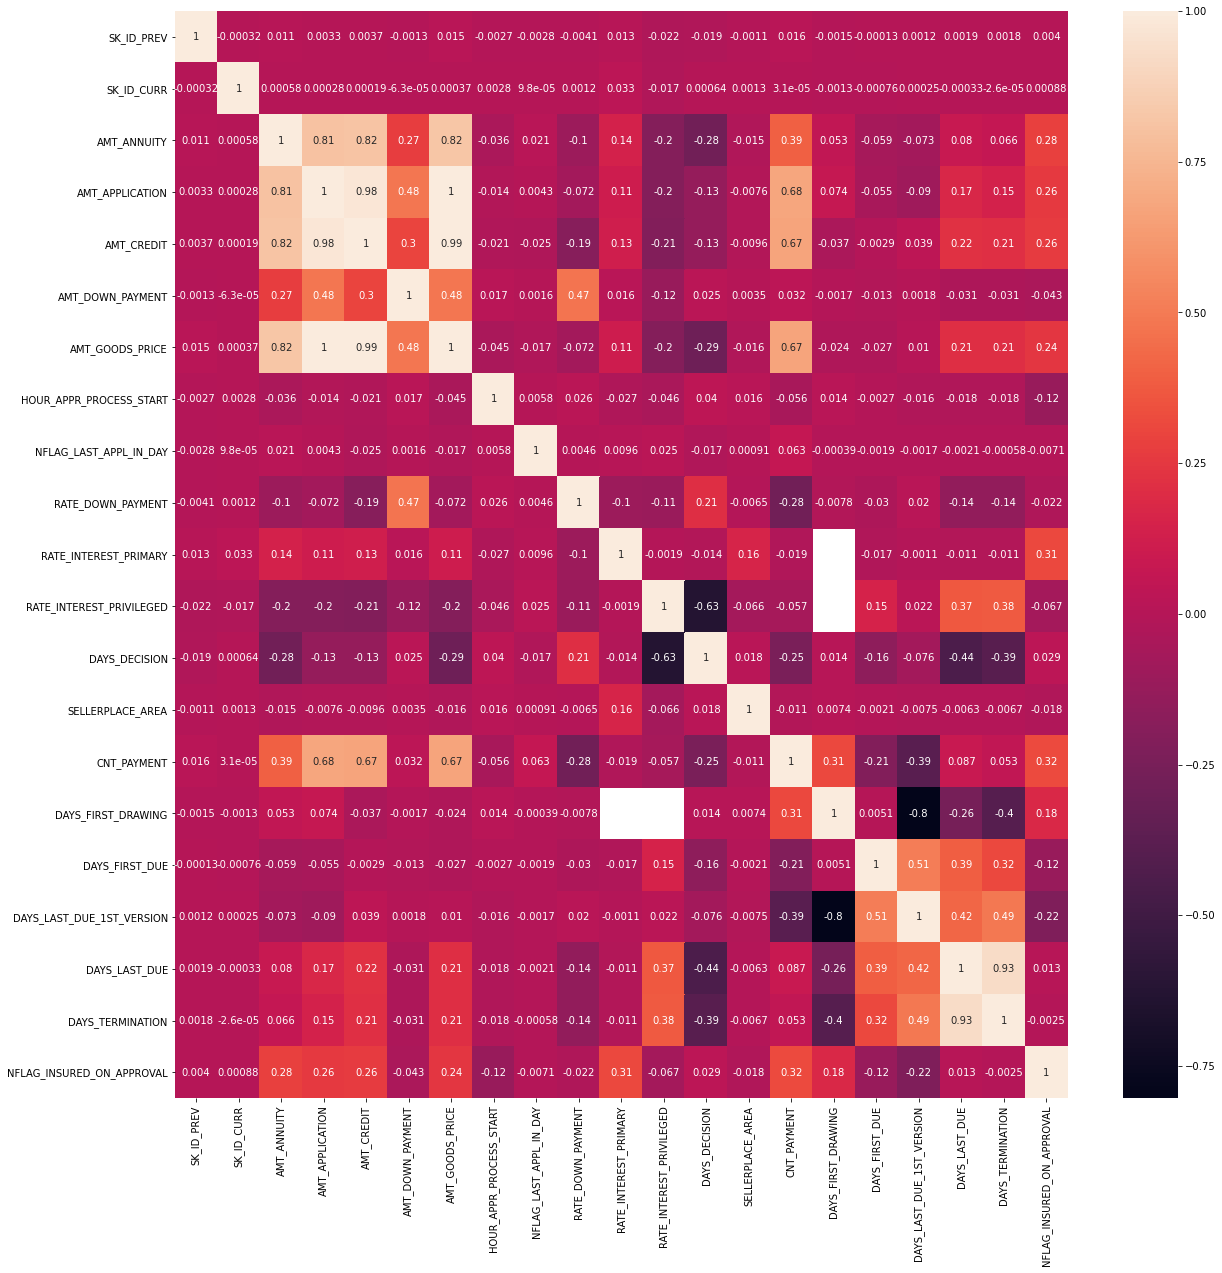

In [99]:
appdata_prev.corr()
plt.figure(figsize=(20,20))
sns.heatmap(appdata_prev.corr(),annot=True);

In [100]:
appdata_prev = appdata_prev.corr().where(np.triu(np.ones(appdata_prev.corr().shape),k=1).astype(np.bool))
appdata_prev = appdata_prev.unstack()
appdata_prev = appdata_prev.sort_values(ascending=False).drop_duplicates()
appdata_prev.head(10)   

<ipython-input-100-1ed21c11ca37>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  appdata_prev = appdata_prev.corr().where(np.triu(np.ones(appdata_prev.corr().shape),k=1).astype(np.bool))


AMT_GOODS_PRICE   AMT_APPLICATION    0.999884
                  AMT_CREDIT         0.993087
AMT_CREDIT        AMT_APPLICATION    0.975824
DAYS_TERMINATION  DAYS_LAST_DUE      0.927777
AMT_GOODS_PRICE   AMT_ANNUITY        0.820895
AMT_CREDIT        AMT_ANNUITY        0.816429
AMT_APPLICATION   AMT_ANNUITY        0.808872
CNT_PAYMENT       AMT_APPLICATION    0.680630
                  AMT_CREDIT         0.674278
                  AMT_GOODS_PRICE    0.672129
dtype: float64

**Insights**
1. From heat map we can say that No field is correlated with the TARGET variable so we need some other information to draw conclusions on the target variable.
2. There is a strong correlation between (AMT_GOODS_PRICE and AMT_CREDIT),(AMT_CREDIT and AMT_APPLICATION)and (DAYS_TERMINATION and DAYS_LAST_DUE).

### Conclusion

1. We can observe that the majority of loans are approved and very less percentage of loans are unused offer.
2. We observe that there are less number of applicants that come in the weekends.
3. 99% of the clients chose to pay cash through the bank.
4. We observe that HC is the reason why the majority of applications got rejected.
5. We observe that the majority of the clients are repeaters.
6. We observe that the majority of previous application is for POS and a good amount of it is for cash.
7. We observe that the majority of loans are for mobiles, consumer electronics, computers and furniture.
8. We observe that there are some outliers and the curve is not normal or a bell curve (AMT_ANNUITY)
9. We observe that there are some outliers and the curve is not normal or a bell curve (AMT_GOODS_PRICE) 

# Overall Conclusion

1.  Bank current situation for giving loans:

    --Majority of the loans are approved
    
    --99% of the clients chose to pay cash through the bank
    
    -- HC is the reason why the majority of applications got rejected
    
    --majority of the clients are repeaters

    
2. Banks should focus more on clients with  
   --contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful          payments.
   
   --from housing type ‘With parents’ as they are having least number of unsuccessful payments.
   
   --family members of 3 or more and owns a car


3. Banks should be cautious with Clients
   
   --in age group 27-30 years with income type 'average' and contract type ‘Working’ and 'Unaccompanied' as they are having           most number of unsuccessful payments.
   
   --from housing type 'Rented/ Municipal appartment'
   
   --with loan purpose ‘Repair’
   
   --who are females having education type 'secondary education'/'incomplete higher'/'higher education' and contrct type 'cash      loans/revolving loans'
   
   -- with Family members of 2 and do not own a car
